## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

## Read the file and create a pandas dataframe

In [2]:
df = pd.read_csv("laptop_details.csv")
df.head()

,Product,Rating,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...


In [3]:
df.shape

(720, 4)

In [4]:
df.describe()

,Rating
count,581.000000
mean,4.321170
std,0.282872
min,3.000000
25%,4.200000
50%,4.300000
75%,4.500000
max,5.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Product  720 non-null    object 
 1   Rating   581 non-null    float64
 2   MRP      720 non-null    object 
 3   Feature  720 non-null    object 
dtypes: float64(1), object(3)
memory usage: 22.6+ KB


In [6]:
df.isnull().sum()

Product      0
Rating     139
MRP          0
Feature      0
dtype: int64

In [7]:
df.Rating.value_counts()

4.2    165
4.3     72
4.4     58
4.1     56
4.6     52
4.5     48
4.0     27
4.9     26
4.7     16
3.9     15
4.8     13
5.0     12
3.7     11
3.8      4
3.5      2
3.6      2
3.4      1
3.0      1
Name: Rating, dtype: int64

In [8]:
df[df["Rating"] < 4].head(2)

,Product,Rating,MRP,Feature
22,Lenovo Celeron Dual Core - (4 GB/256 GB HDD/25...,3.7,"₹19,490",Intel Celeron Dual Core Processor4 GB LPDDR4 R...
43,HP Athlon Dual Core 3050U - (8 GB/256 GB SSD/W...,3.9,"₹25,990",AMD Athlon Dual Core Processor8 GB DDR4 RAM64 ...


In [9]:
df.Rating.isna().sum()

139

## Clean the MRP feature

In [10]:
import re
df["MRP"] = df["MRP"].apply(lambda price: re.sub("[^0-9]", "", price))
df.head(3)

,Product,Rating,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...


In [11]:
print(df.loc[0][0])
print(df.loc[1][0])
print(df.loc[6][0])
print(df.loc[10][0])

Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 GB SSD/Windows 11 Home) 14ITL05 Thin and Light Laptop
Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) 82H801L7IN | 82H802FJIN | 82H802...
DELL Inspiron Core i3 11th Gen - (8 GB/1 TB HDD/256 GB SSD/Windows 11 Home) D560841WIN9S Thin and Ligh...
HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeF...


## Extract the features from the specifications provided 

In [12]:
model = []
RAM = []
HDD = []
HD = []
HD_GB = []
HDD_SSD = []
model_type = []
for row in range(df.shape[0]):
    model.append(df.loc[row, "Product"].split(" ", 1)[0])
    RAM.append(df.loc[row, "Product"].split("GB")[0].strip()[-2:].replace("(", ""))
    HD.append(df.loc[row, "Product"].split("/")[1].split(" ")[0]) 
    HD_GB.append(df.loc[row, "Product"].split("/")[1].split(" ")[1])
    HDD_SSD.append(df.loc[row, "Product"].split("/")[1].split(" ")[2])
    model_type.append(df.loc[row, "Product"].split(" ", 1)[1].split("Core")[0])

df_ = pd.DataFrame({"Model": model, "Model_Type": model_type, "RAM (GB)": RAM, "HD": HD})
df_

,Model,Model_Type,RAM (GB),HD
0,Lenovo,IdeaPad 3,8,256
1,Lenovo,IdeaPad 3,8,512
2,ASUS,VivoBook 15 (2022),8,512
3,HP,Pavilion Ryzen 5 Hexa,8,512
4,ASUS,TUF Gaming F15,8,512
...,...,...,...,...
715,ASUS,Chromebook Flip Touch Celeron Dual,4,64
716,Lenovo,IdeaPad Gaming 3 Ryzen 7 Octa,8,512
717,ASUS,ROG Zephyrus G15 Ryzen 9 Octa,16,1
718,ASUS,Zenbook Flip 14 OLED (2022) Touch Panel,16,512


In [13]:
df_["Model_Type"].value_counts()

IdeaPad 3                                                67
                                                         43
ROG Strix G15 (2022) with 90Whr Battery Ryzen 9 Octa     31
Pro                                                      31
IdeaPad 1 Ryzen 5 Quad                                   30
                                                         ..
Lenovo Legion 5 Pro Ryzen 7 Octa                          1
Inspiron Ryzen 5 Dual                                     1
ROG Flow X13 Ryzen 7 Octa                                 1
Ryzen 5 Dual                                              1
Ideapad Slim 3i                                           1
Name: Model_Type, Length: 227, dtype: int64

In [14]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Model       720 non-null    object
 1   Model_Type  720 non-null    object
 2   RAM (GB)    720 non-null    object
 3   HD          720 non-null    object
dtypes: object(4)
memory usage: 22.6+ KB


In [15]:
for row in range(df_.shape[0]):
    HD_val = int(df_.loc[row, "HD"])
    if int(HD_val) < 10:
        df_.loc[row, "HD"] = 1024 * int(HD_val)

In [16]:
df_

,Model,Model_Type,RAM (GB),HD
0,Lenovo,IdeaPad 3,8,256
1,Lenovo,IdeaPad 3,8,512
2,ASUS,VivoBook 15 (2022),8,512
3,HP,Pavilion Ryzen 5 Hexa,8,512
4,ASUS,TUF Gaming F15,8,512
...,...,...,...,...
715,ASUS,Chromebook Flip Touch Celeron Dual,4,64
716,Lenovo,IdeaPad Gaming 3 Ryzen 7 Octa,8,512
717,ASUS,ROG Zephyrus G15 Ryzen 9 Octa,16,1024
718,ASUS,Zenbook Flip 14 OLED (2022) Touch Panel,16,512


In [17]:
df_["Model"].unique()

array(['Lenovo', 'ASUS', 'HP', 'DELL', 'RedmiBook', 'realme', 'acer',
       'MSI', 'APPLE', 'Infinix', 'SAMSUNG', 'Ultimus', 'Vaio',
       'GIGABYTE', 'Nokia', 'ALIENWARE'], dtype=object)

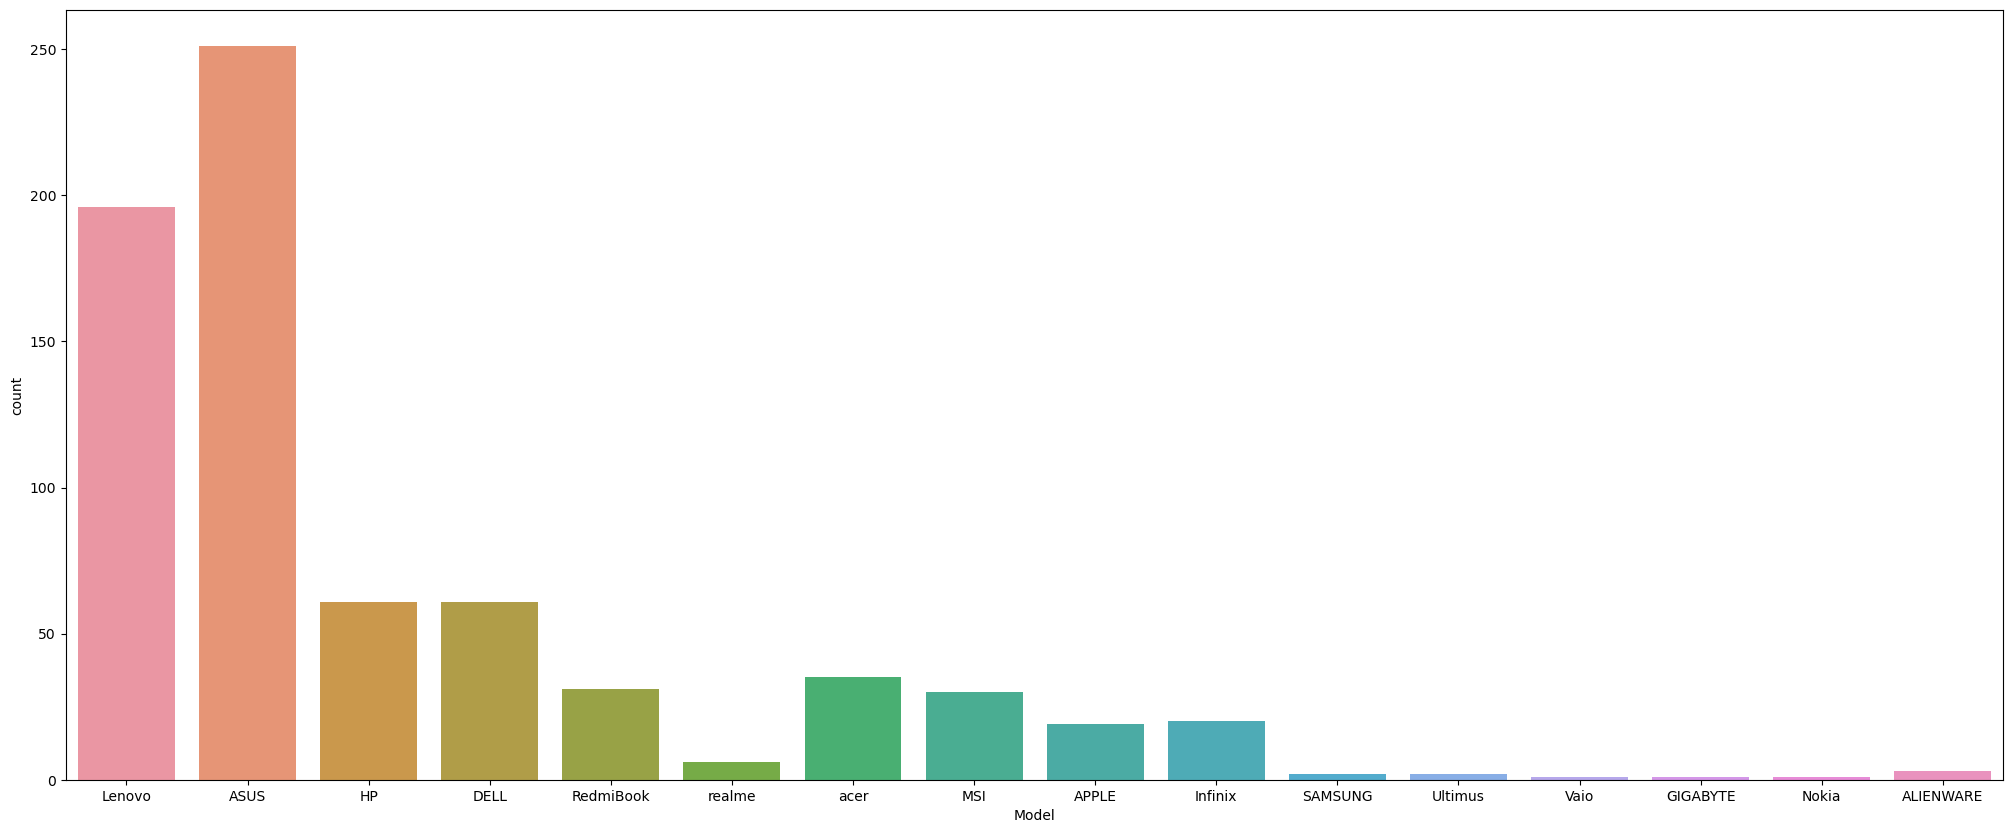

In [18]:
plt.figure(figsize=(25, 10))
sns.countplot(data = df_, x = df_.Model)
plt.show()

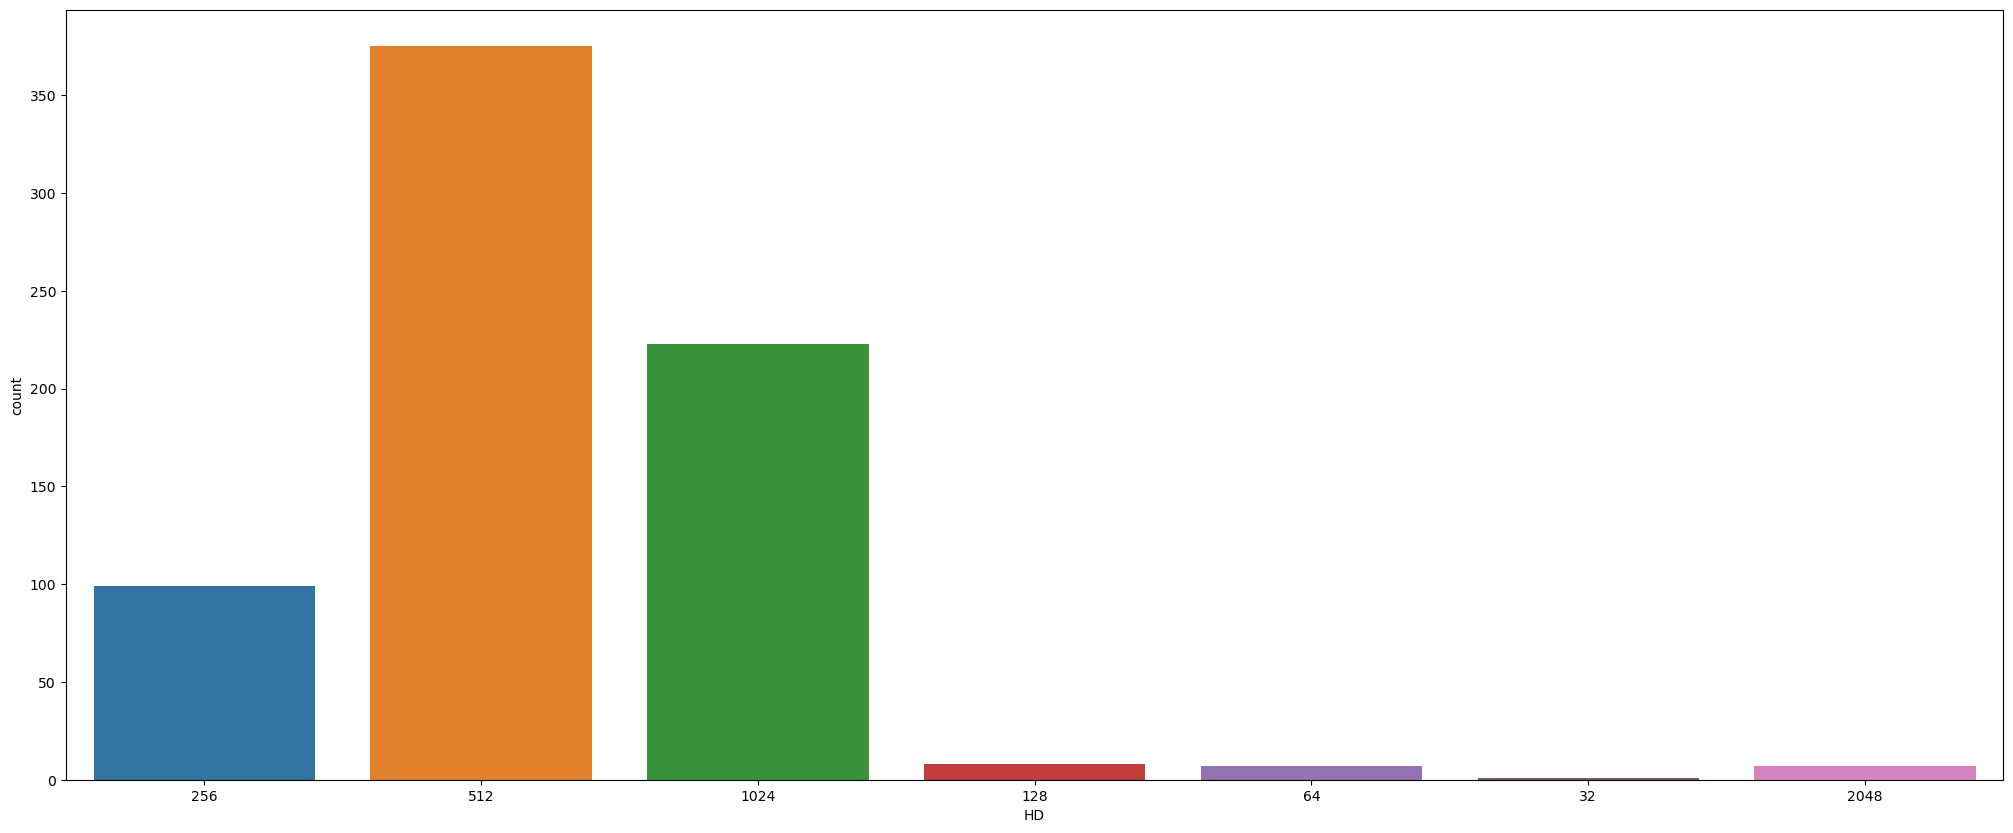

In [19]:
plt.figure(figsize=(25, 10))
sns.countplot(data = df_, x = df_.HD)
plt.show()

## Transform the label features to numerical features

In [20]:
from sklearn.preprocessing import LabelEncoder
lbl_enc = LabelEncoder()
df_enc = pd.DataFrame()

for col in df_.columns[:-1]:
    df_enc[col] = lbl_enc.fit_transform(df_[col])

In [21]:
df_enc

,Model,Model_Type,RAM (GB)
0,7,73,3
1,7,73,3
2,2,191,3
3,5,123,3
4,2,173,3
...,...,...,...
715,2,44,2
716,7,85,3
717,2,148,0
718,2,223,0


In [22]:
df_enc.Model_Type.value_counts()

73     67
0      43
138    31
127    31
72     30
       ..
108     1
100     1
132     1
155     1
91      1
Name: Model_Type, Length: 227, dtype: int64

In [23]:
df_ = pd.concat([df_enc, df["Rating"]], axis =1)
df_.head(3)

,Model,Model_Type,RAM (GB),Rating
0,7,73,3,4.2
1,7,73,3,4.2
2,2,191,3,4.3


In [24]:
df = pd.concat([df_, df.MRP], axis=1)
df.drop(['Model_Type'], inplace=True, axis =1)
df.dropna(axis=0, inplace=True)
df.shape

X = df.iloc[:, :-1]
y = df.iloc[:,-1]

## Split the data and model creation

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=40)

In [27]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

y_pred_lr = lin_reg.predict(X_test)
y_pred_lr

array([ 18758.93477031,  90659.92842912, 117983.96567079,  56125.33240397,
        56802.92272533,  43864.83575026,  61980.71054472,  61146.51259996,
       112962.7854748 ,  61146.51259996,  56125.33240397,  43864.83575026,
       129474.18935431,  56125.33240397,  34500.06567965,  51104.15220798,
       117983.96567079, 112962.7854748 ,   9486.84734852, 117983.96567079,
        63714.10720236,  51781.74252934,  85546.06558431,  79783.37009238,
        48886.01594625,  46760.56233335,  41596.61545431,  36040.61162001,
        43864.83575026,  43772.15310145, 117983.96567079,  38843.65555427,
        43864.83575026,  77657.91647947,  21654.6613534 ,  48886.01594625,
       133047.50625876,  44635.10872045,  58928.37633823,  42324.2898099 ,
       117983.96567079, 117983.96567079,  49656.28891644,  72636.73628348,
        39613.92852446, 112962.7854748 ,  58928.37633823,  31697.02174538,
        96451.38159529, 102920.42508282,  43864.83575026,  38750.97290546,
       117983.96567079,  

In [28]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor()

sgd_reg.fit(X_train, y_train)

y_pred_sgd = sgd_reg.predict(X_test)
y_pred_sgd

array([ 31939.92451776,  97063.07629403, 115468.97704237,  55462.17823351,
        53116.4378291 ,  44730.80693628,  83348.6563545 ,  58020.35471721,
       112910.80055867,  58020.35471721,  55462.17823351,  44730.80693628,
       122219.96897249,  55462.17823351,  37268.71356447,  52904.0017498 ,
       115468.97704237, 112910.80055867,  30803.95091746, 115468.97704237,
        60752.6938388 ,  50558.2613454 ,  88178.78003881,  66618.42168933,
        47288.98341999,  48000.08486169,  57557.20911719,  45229.47229869,
        44730.80693628,  38404.68716477, 115468.97704237,  42172.63045258,
        44730.80693628,  67329.52313104,  35209.20244316,  47288.98341999,
       123143.50649349,  48711.18630339,  52405.3363874 ,  36770.04820206,
       115468.97704237, 115468.97704237,  51269.3627871 ,  64771.34664733,
        46153.00981969, 112910.80055867,  52405.3363874 ,  40325.55541058,
       103601.63214485, 107794.44759126,  44730.80693628,  35846.51068106,
       115468.97704237,  

In [29]:
from sklearn.svm import SVR

svc_reg = SGDRegressor()

svc_reg.fit(X_train, y_train)

y_pred_svc = svc_reg.predict(X_test)
y_pred_svc

array([ 36593.93210882, 102133.48480935, 120945.61656285,  60740.44592569,
        58521.61638131,  49929.88726724,  87759.01214459,  63407.63695737,
       118278.42553116,  63407.63695737,  60740.44592569,  49929.88726724,
       127908.67215157,  60740.44592569,  42376.67565949,  58073.254894  ,
       120945.61656285, 118278.42553116,  35107.05311517, 120945.61656285,
        66150.7744099 ,  55854.42534963,  93399.96116356,  72447.72755875,
        52597.07829892,  53187.23431794,  62138.49891628,  50071.68179895,
        49929.88726724,  43863.55465314, 120945.61656285,  47262.69623555,
        49929.88726724,  73037.88357778,  39851.27915952,  52597.07829892,
       128947.1896579 ,  53777.39033696,  57931.46036229,  42234.88112778,
       120945.61656285, 120945.61656285,  56444.58136865,  70370.69254609,
        51110.19930528, 118278.42553116,  57931.46036229,  45185.66122289,
       108648.17891076, 112944.04346779,  49929.88726724,  41196.36362145,
       120945.61656285,  

## Evaluate the metrics for regression models

In [30]:
def eval_metrics(model_name, y_pred, y_test):
    from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
    print("*"*70)
    print("Model name: {0}".format(model_name))
    
    mse = mean_squared_error(y_pred, y_test)
    print("Mean Squared Error: ", round(mse, 2))

    print("Root Mean Squared Error: ", round(np.sqrt(mse), 2))

    mae = mean_absolute_error(y_pred, y_test)
    print("Mean Absolute Error: ", round(mae, 2))

    r2_score = r2_score(y_pred, y_test)
    print("R2 Score: ", round(r2_score, 2))

In [31]:
eval_metrics("Linear Regression", y_pred_lr, y_test)
eval_metrics("SGD Regression", y_pred_sgd, y_test)
eval_metrics("SVC Regression", y_pred_svc, y_test)

**********************************************************************
Model name: Linear Regression
Mean Squared Error:  769203028.22
Root Mean Squared Error:  27734.51
Mean Absolute Error:  19758.32
R2 Score:  0.27
**********************************************************************
Model name: SGD Regression
Mean Squared Error:  814501075.08
Root Mean Squared Error:  28539.47
Mean Absolute Error:  20393.24
R2 Score:  0.09
**********************************************************************
Model name: SVC Regression
Mean Squared Error:  872501410.23
Root Mean Squared Error:  29538.13
Mean Absolute Error:  22580.58
R2 Score:  0.04
